# Algoritmos de Aprendizaje Supervisado



Instalación de Librerias

In [9]:
pip install pandas numpy matplotlib seaborn scikit-learn

Importar bibliotecas

In [10]:
# Importar bibliotecas
import pandas as pd # Cargar y manipular el dataset.
import numpy as np # Realizar cálculos numéricos.
import matplotlib.pyplot as plt # Para la visualización de datos.
import seaborn as sns # Para la visualización de datos.

Para el preprocesamiento, la división del dataset, entrenamiento del modelo y evaluación.

In [8]:
## Para el preprocesamiento, la división del dataset, entrenamiento del modelo y evaluación.

# train_test_split: Importa la función para dividir datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
# MinMaxScaler: Importa la clase para escalar datos numéricos
from sklearn.preprocessing import MinMaxScaler
# Entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Cargamos los datos

In [11]:
# Cargamos los datos

data_path  = 'Dataset_Vehicle/car data.csv'
car_data = pd.read_csv(data_path)

## Análisis Exploratorio de Datos (EDA)

Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

Este análisis nos ayudará a identificar relaciones entre variables, valores atípicos y tendencias en los datos.

Información o estructura general del dataset

In [ ]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


Nombre de columnas y cantidad de filas y columnas.

In [12]:
print(car_data.shape)
# print(len(car_data))
# print(car_data.columns)

(301, 9)


Mostrar las primeras filas del dataset

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Estadísticas descriptivas

In [ ]:
print(car_data.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


Verificar valores nulos

In [ ]:
print("Valores faltantes: ")
print(car_data.isnull().sum())

Valores faltantes: 
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


Eliminar filas de valores nulos

In [14]:
print("Cantidad de filas antes de eliminar valores nulos: ", len(car_data))
car_data = car_data.dropna()
print("Cantidad de filas después de eliminar valores nulos: ", len(car_data))

Cantidad de filas antes de eliminar valores nulos:  301
Cantidad de filas después de eliminar valores nulos:  301


Revisamos datos dublicados

In [15]:
print("Valores duplicados: ")
print(car_data.duplicated().sum())

Valores duplicados: 
2


Eliminar datos duplicados

In [16]:
print("Cantidad de filas antes de eliminar valores duplicados: ", len(car_data))
car_data = car_data.drop_duplicates()
print("Cantidad de filas después de eliminar valores duplicados: ", len(car_data))

Cantidad de filas antes de eliminar valores duplicados:  301
Cantidad de filas después de eliminar valores duplicados:  299


Distribución de variables numéricas

Se crean los histogramas

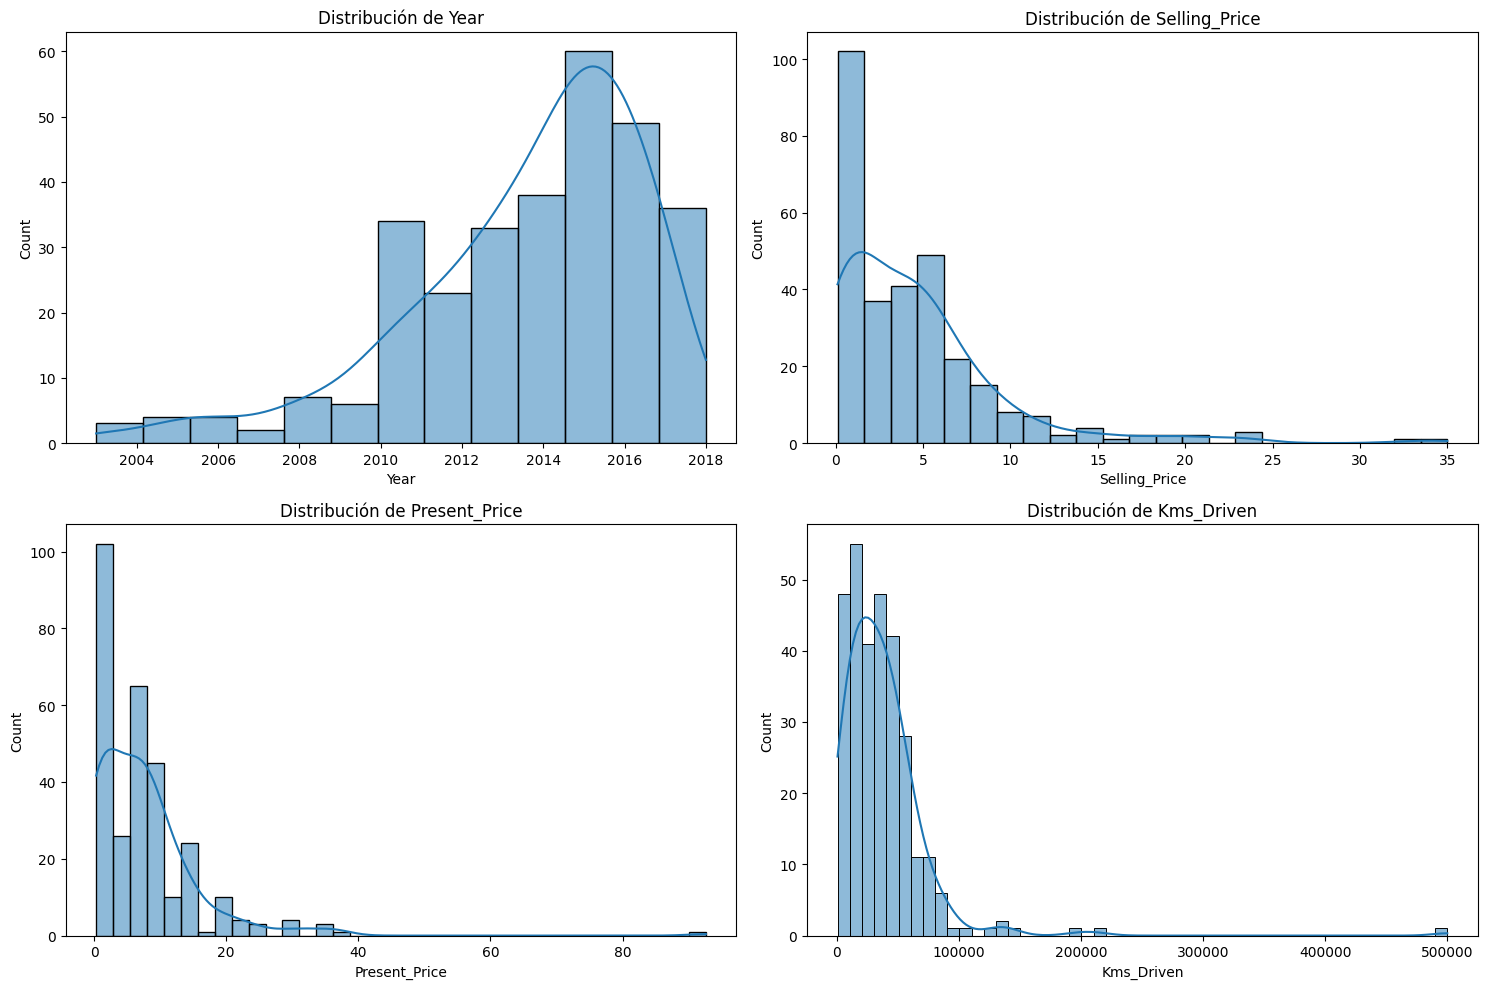

In [17]:
column_year = 'Year'
column_selling_price = 'Selling_Price'
column_present_price = 'Present_Price'
column_kms_driven = 'Kms_Driven'

numeric_cols = [column_year, column_selling_price, column_present_price, column_kms_driven]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    sns.histplot(car_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

Relación entre Selling_Price y Present_Price

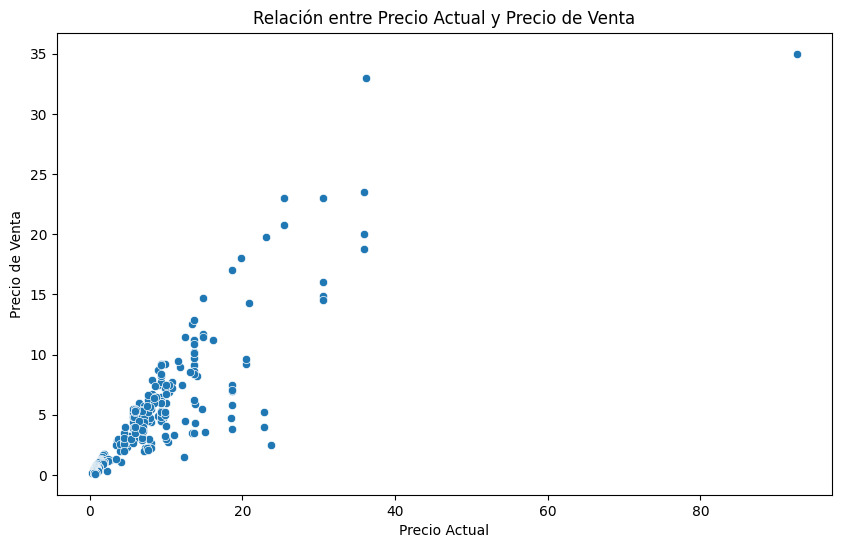

In [18]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.xlabel('Precio Actual')
plt.ylabel('Precio de Venta')
plt.title('Relación entre Precio Actual y Precio de Venta')
plt.show()

Relación entre Año y Precio de Venta

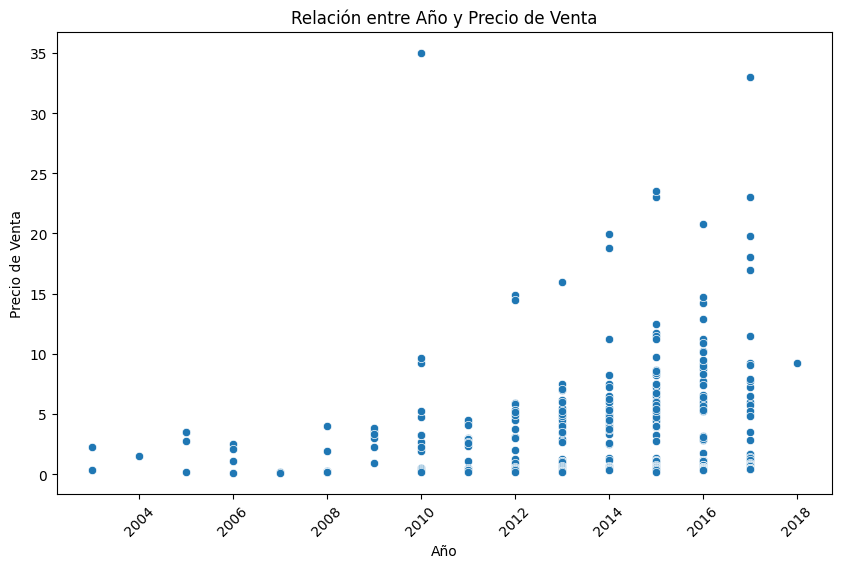

In [19]:
plt.figure(figsize=(10, 6))
x = 'Year'
y = 'Selling_Price'
sns.scatterplot(x=x, y=y, data=car_data)
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.title('Relación entre Año y Precio de Venta')
plt.xticks(rotation=45)
plt.show()

Precio de venta por tipo de combustible


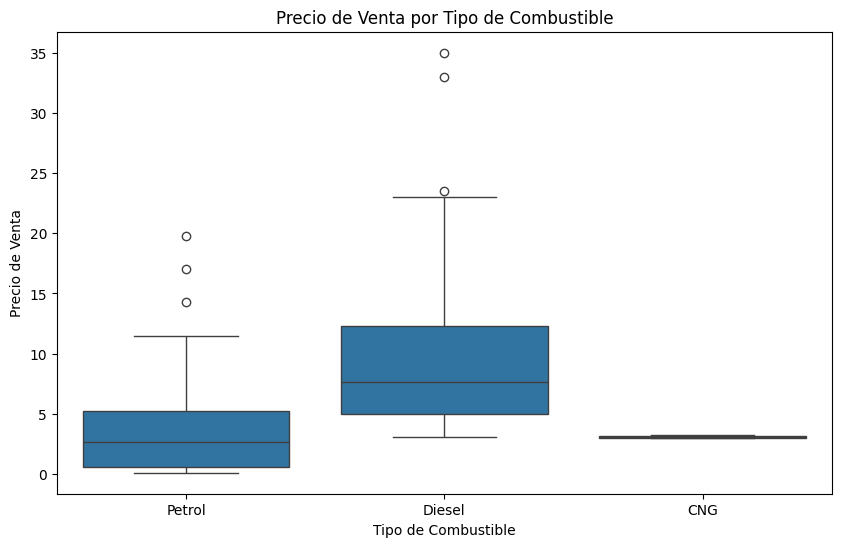

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta')
plt.title('Precio de Venta por Tipo de Combustible')
plt.show()

Mapa de calor para visualizar correlaciones

Correlación entre variables numéricas

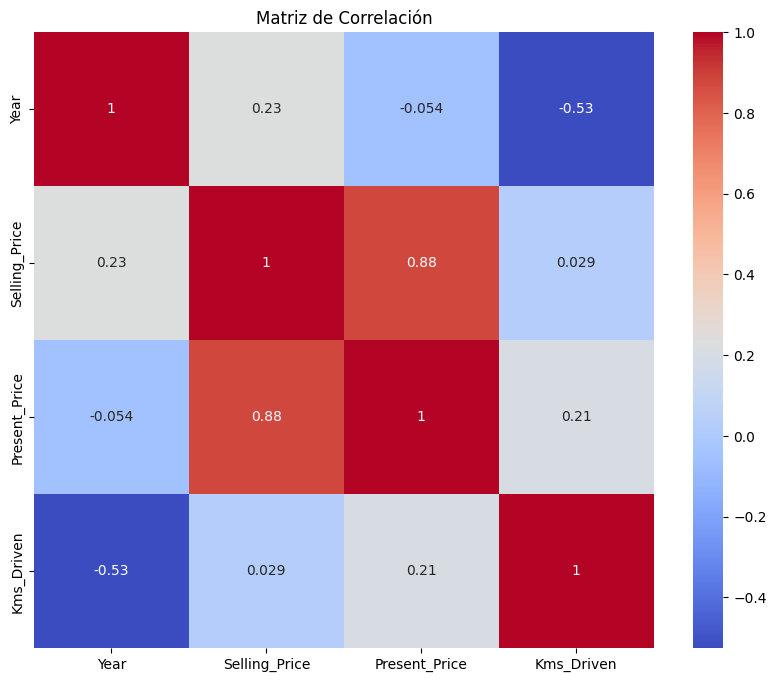

In [21]:
correlation_matrix = car_data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Conteo de autos por tipo de vendedor y transmisión

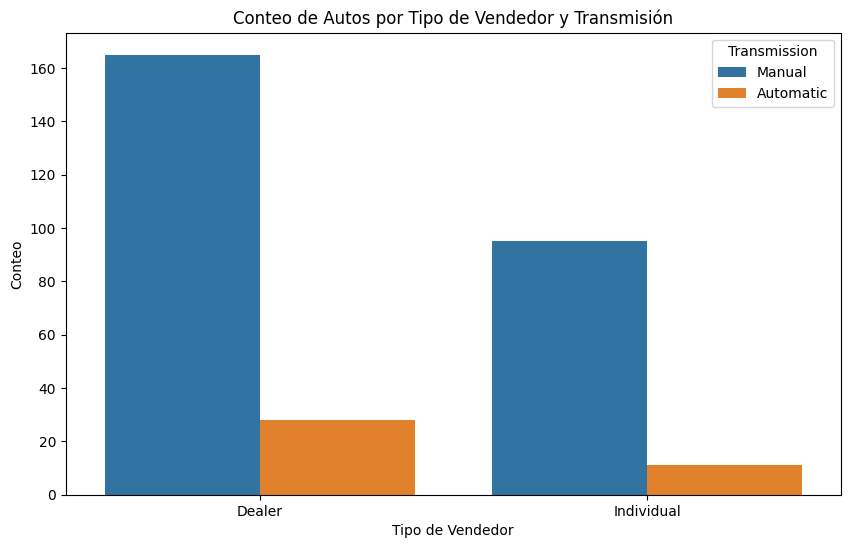

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Seller_Type', hue='Transmission', data=car_data)
plt.xlabel('Tipo de Vendedor')
plt.ylabel('Conteo')
plt.title('Conteo de Autos por Tipo de Vendedor y Transmisión')
plt.show()

Relación entre kilómetros recorridos y precio de venta

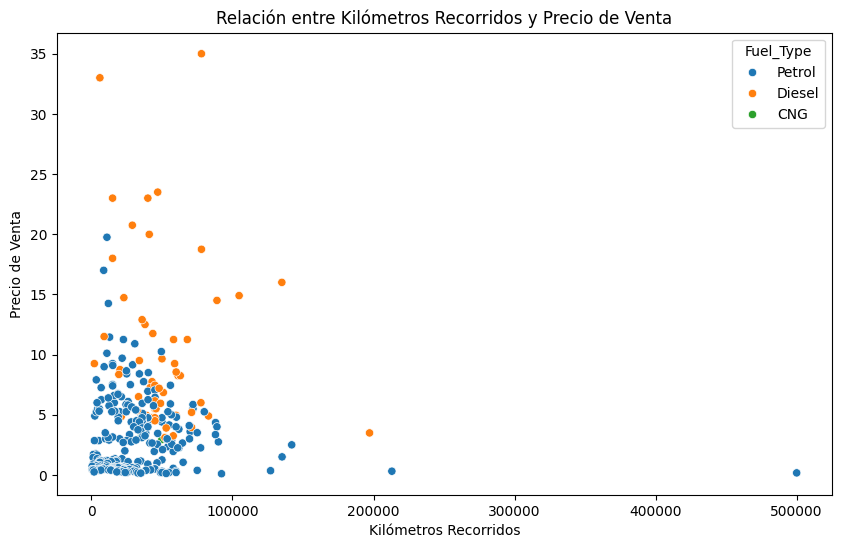

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', hue='Fuel_Type', data=car_data)
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio de Venta')
plt.title('Relación entre Kilómetros Recorridos y Precio de Venta')
plt.show()

Histograma del precio de venta

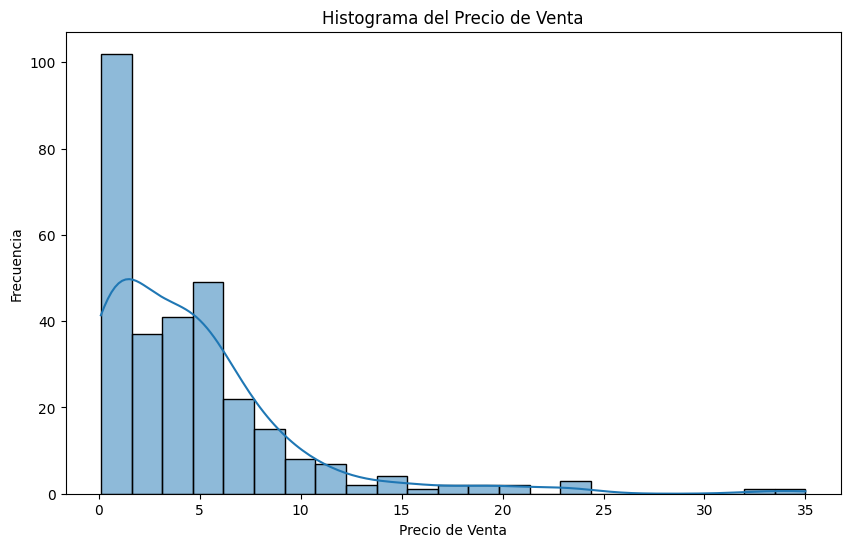

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Selling_Price'], kde=True)
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Histograma del Precio de Venta')
plt.show()

Histograma del precio actual

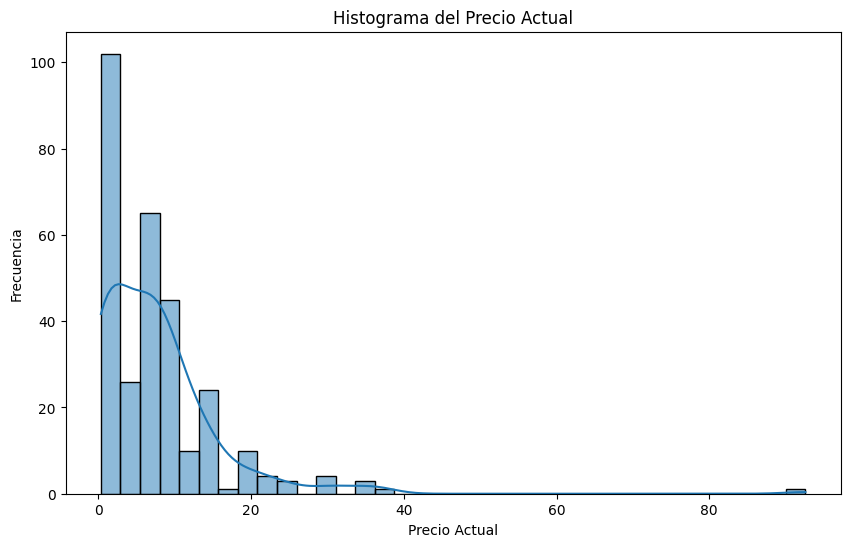

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Present_Price'], kde=True)
plt.xlabel('Precio Actual')
plt.ylabel('Frecuencia')
plt.title('Histograma del Precio Actual')
plt.show()

istograma del por año

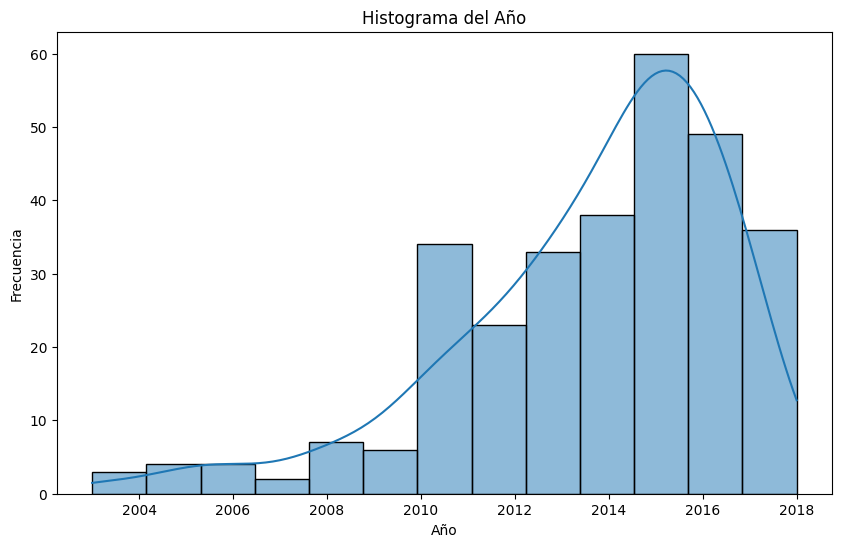

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Year'], kde=True)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Histograma del Año')
plt.show()

# Basado en este análisis exploratorio, podemos extraer las siguientes observaciones:

## Información general del dataset:

El dataset contiene **301** entradas y **9** columnas.

Las columnas incluyen:

1. Car_Name
2. Year
3. Selling_Price
4. Present_Price
5. Kms_Driven
6. Fuel_Type
7. Seller_Type
8. Transmission
9. Owner

## Estadísticas descriptivas:

El rango de años de los vehículos va desde 2003 hasta 2018.

El precio de venta promedio es de aproximadamente 5.04 lakhs (moneda india), con un mínimo de 0.1 y un máximo de 35.0 lakhs.

El kilometraje promedio es de alrededor de 36,947 km.

## Valores nulos:

No se encontraron valores nulos en el dataset, lo cual es positivo para nuestro análisis.

## Distribución de variables numéricas:

La distribución del año de los vehículos muestra una concentración en los años más recientes.
Los precios de venta y los precios actuales tienen una distribución sesgada hacia la derecha, con la mayoría de los vehículos en el rango de precios más bajo.
Los kilómetros recorridos también muestran una distribución sesgada hacia la derecha.

## Relación entre Selling_Price y Present_Price:

Existe una fuerte relación positiva entre el precio actual y el precio de venta.

## Relación entre Año y Precio de Venta:

En general, los vehículos más nuevos tienden a tener precios de venta más altos.

## Precio de venta por tipo de combustible:

Los vehículos diésel tienden a tener precios de venta más altos, seguidos por los de gasolina y luego los de GNC.

## Correlación entre variables numéricas:

Hay una fuerte correlación positiva entre Present_Price y Selling_Price (0.88).
Existe una correlación positiva moderada entre Year y Selling_Price (0.23).
Hay una correlación negativa débil entre Kms_Driven y Selling_Price (-0.10).

## Conteo de autos por tipo de vendedor y transmisión:

La mayoría de los vehículos son vendidos por concesionarios.
Hay más vehículos con transmisión manual que automática.

## Relación entre kilómetros recorridos y precio de venta:

Se observa una tendencia general de que los vehículos con más kilómetros recorridos tienen precios de venta más bajos.
Los vehículos diésel tienden a tener precios más altos en comparación con los de gasolina y GNC para kilometrajes similares.


## Preprocesamiento de los datos

En este paso, se deben limpiar los datos, transformar variables categóricas en variables numéricas (dummy variables), y asegurarse de que no haya valores faltantes.

Eliminamos la columna Car_Name ya que no aporta valor predictivo


In [28]:
car_processed = car_data.drop('Car_Name', axis=1)

In [30]:
car_processed.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [31]:
car_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    299 non-null    int64  
 1   Selling_Price           299 non-null    float64
 2   Present_Price           299 non-null    float64
 3   Kms_Driven              299 non-null    int64  
 4   Owner                   299 non-null    int64  
 5   Fuel_Type_Diesel        299 non-null    bool   
 6   Fuel_Type_Petrol        299 non-null    bool   
 7   Seller_Type_Individual  299 non-null    bool   
 8   Transmission_Manual     299 non-null    bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 15.2 KB


In [33]:
car_processed.shape

(299, 9)

Convertir las variables categóricas (Fuel_Type, Seller_Type, Transmission) en variables numéricas

Ya se conocen las variables con valores numericos.

In [40]:
# Convertir las variables categóricas (Fuel_Type, Seller_Type, Transmission) en variables numéricas
# column_year = 'Car_Age' # 'Year'
# column_selling_price = 'Selling_Price'
# column_present_price = 'Present_Price'
# column_kms_driven = 'Kms_Driven'
# numeric_cols = [column_year, column_selling_price, column_present_price, column_kms_driven]


# Convertir variables categóricas en variables dummy
# car_processed = pd.get_dummies(car_processed, columns=['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], drop_first=True)

car_processed = pd.get_dummies(car_processed, drop_first=True)

# Ver las nuevas columnas del dataframe
print(car_processed.head())

   Year  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0  2014           3.35           5.59       27000      0             False   
1  2013           4.75           9.54       43000      0              True   
2  2017           7.25           9.85        6900      0             False   
3  2011           2.85           4.15        5200      0             False   
4  2014           4.60           6.87       42450      0              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  


In [47]:
print(car_processed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    299 non-null    int64  
 1   Selling_Price           299 non-null    float64
 2   Present_Price           299 non-null    float64
 3   Kms_Driven              299 non-null    int64  
 4   Owner                   299 non-null    int64  
 5   Fuel_Type_Diesel        299 non-null    bool   
 6   Fuel_Type_Petrol        299 non-null    bool   
 7   Seller_Type_Individual  299 non-null    bool   
 8   Transmission_Manual     299 non-null    bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 15.2 KB
None


In [43]:
print(car_processed.Fuel_Type_Petrol.value_counts())
print(car_processed.Fuel_Type_Diesel.value_counts())
print(car_processed.Seller_Type_Individual.value_counts())
print(car_processed.Transmission_Manual.value_counts())

Fuel_Type_Petrol
True     239
False     60
Name: count, dtype: int64
Fuel_Type_Diesel
False    241
True      58
Name: count, dtype: int64
Seller_Type_Individual
False    193
True     106
Name: count, dtype: int64
Transmission_Manual
True     260
False     39
Name: count, dtype: int64


In [44]:
car_processed.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_processed.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_processed.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [50]:
# Ver las nuevas columnas del dataframe
car_processed.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


## Seleccionar las características más relevantes

Revisamos la correlación entre las variables para identificar qué características tienen mayor influencia en la variable objetivo (Selling_Price).

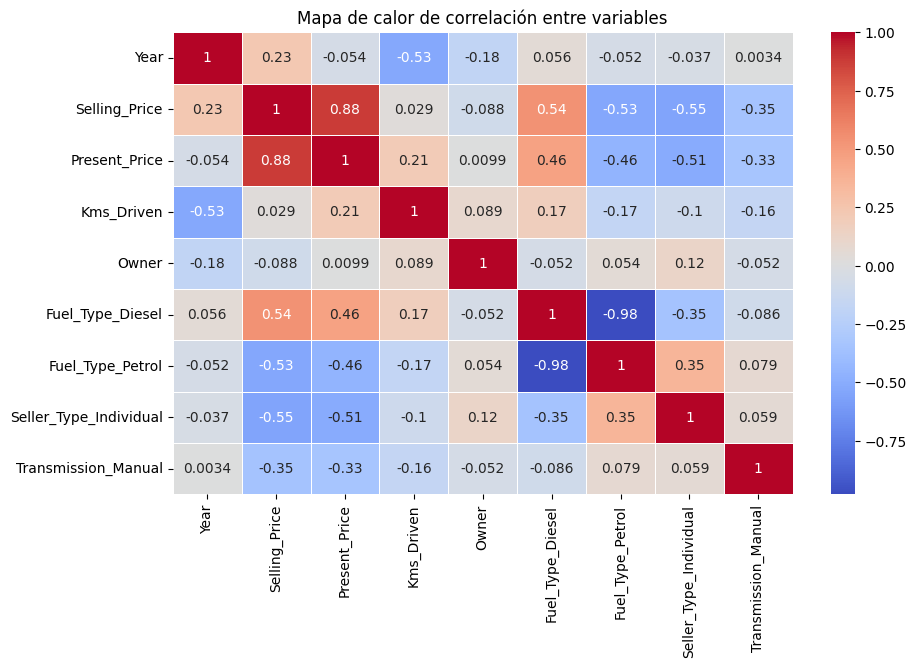

In [54]:
# Mapa de calor para ver las correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(car_processed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

Revisar las correlaciones individuales con la variable objetivo

 Muestra las relaciones entre las variables, destacando cuáles tienen mayor correlación con la variable objetivo (Selling_Price).

In [52]:
# Revisar las correlaciones individuales con la variable objetivo
car_processed.corr()['Selling_Price'].sort_values(ascending=False)

,Selling_Price
Selling_Price,1.000000
Present_Price,0.876378
Fuel_Type_Diesel,0.543541
Year,0.234369
Kms_Driven,0.028566
Owner,-0.087880
Transmission_Manual,-0.348869
Fuel_Type_Petrol,-0.531636
Seller_Type_Individual,-0.553851


In [53]:
# Revisar las correlaciones individuales
car_processed.corr()['Year'].sort_values(ascending=False)

,Year
Year,1.000000
Selling_Price,0.234369
Fuel_Type_Diesel,0.056469
Transmission_Manual,0.003434
Seller_Type_Individual,-0.036820
Fuel_Type_Petrol,-0.052197
Present_Price,-0.053563
Owner,-0.181639
Kms_Driven,-0.525714


In [58]:
car_processed.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


Extraemos la correlación de cada característica con la variable objetivo (Selling_Price)

In [59]:
correlation_matrix = car_processed.corr()
correlation_with_target = correlation_matrix['Selling_Price'].sort_values(ascending=False)
print("Correlación de las características con la variable Selling_Price:\n", correlation_with_target)


Correlación de las características con la variable Selling_Price:
 Selling_Price             1.000000
Present_Price             0.876378
Fuel_Type_Diesel          0.543541
Year                      0.234369
Kms_Driven                0.028566
Owner                    -0.087880
Transmission_Manual      -0.348869
Fuel_Type_Petrol         -0.531636
Seller_Type_Individual   -0.553851
Name: Selling_Price, dtype: float64


## Dividir el dataset en entrenamiento y prueba

División del dataset:
  Divide los datos en un conjunto de entrenamiento y otro de prueba, usando un 80% para entrenar el modelo y un 20% para probarlo.

Definimos X (características) y y (variable objetivo)

Dividimos el dataset en características (X) y la variable objetivo (y). Luego, dividimos en conjuntos de entrenamiento y prueba para evaluar correctamente el modelo.

In [60]:
# Separar las características y la variable objetivo
X = car_processed.drop('Selling_Price', axis=1)
y = car_processed['Selling_Price']
print(X.shape)
print(y.shape)

(299, 8)
(299,)


In [63]:
car_processed.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [64]:
car_processed.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


División en conjuntos de entrenamiento y prueba

Dividir los datos en conjuntos de entrenamiento y prueba (80% para entrenamiento, 20% para prueba)



In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (239, 8)
Tamaño del conjunto de prueba: (60, 8)


## Entrenar el modelo

Utilizaremos la clase LinearRegression de scikit-learn para entrenar el modelo.

Entrenamos un modelo de regresión lineal con los datos de entrenamiento.

In [68]:
# Crear el modelo de regresión lineal

model = LinearRegression()

In [69]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

Predicciones con los datos de prueba

In [70]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

In [81]:
print(y_pred)

[ 7.50192151  7.79152142  1.36644388  7.00941894 11.16328988  4.53410247
  8.49246345  1.70078181  8.82421963 -0.96348801 10.31444007 -0.97386896
  0.71832735  1.53711566  4.97622203  5.04627395  1.29503012  1.85159301
 21.56570817  0.86767992  0.93078859  2.45202839  5.58169747  0.2581242
  6.26649907  7.82350038  8.68226641  1.1746619   4.84357381  4.92069701
  3.26811058  5.48959967  6.27470319  2.75388094  2.90385159  6.96790194
  1.26406586 -4.97141242  1.38043678 10.38468561  7.10536052  9.04017934
  1.62741133  4.01521109  0.97463542 -2.14675103  8.1451697   4.37395524
  5.64880685 -0.59577608  0.66072164  0.20325682 10.20766115  9.45415687
  7.29949412  6.25536738  3.71408634  3.43110175  9.56341995  9.1600735 ]


In [80]:
# Coeficientes de la regresión
beta_0 = model.intercept_  # Intercepto
model_coefficients = model.coef_  # Coeficientes de las características
## Year, Selling_Price, Present_Price, Kms_Driven, Owner, Fuel_Type_Diesel, Fuel_Type_Petrol, Seller_Type_Individual = model.coef_  # Pendientes ()

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print("")

print("Coeficientes de la regresión:")
print("")

num = 0
for feature, coef in zip(X.columns, model_coefficients):
  num += 1
  print(f"Coeficiente ({feature}, β{num}: {coef}")

Intercepto (β0): -664.0591876645656

Coeficientes de la regresión:

Coeficiente (Year, β1: 0.33104096076390827
Coeficiente (Present_Price, β2: 0.43718674080864645
Coeficiente (Kms_Driven, β3: -1.0518112665169888e-05
Coeficiente (Owner, β4: 0.6428556348578149
Coeficiente (Fuel_Type_Diesel, β5: 2.139111026852676
Coeficiente (Fuel_Type_Petrol, β6: 0.6906221316492425
Coeficiente (Seller_Type_Individual, β7: -1.3013768754094712
Coeficiente (Transmission_Manual, β8: -1.5721252084787805


## Evaluar el desempeño del modelo

Evaluaremos el modelo utilizando métricas como el R² (coeficiente de determinación), el Error Cuadrático Medio (MSE), y el Error Absoluto Medio (MAE). Estas métricas te ayudarán a entender qué tan bien está prediciendo el modelo.

In [82]:
# Paso 6: Evaluar el modelo
# Calcular el R², MSE y MAE

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Coeficiente de determinación R²: {r2}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Coeficiente de determinación R²: 0.7528154215831643
Error Cuadrático Medio (MSE): 6.370752956826559
Error Absoluto Medio (MAE): 1.472892414003326


In [83]:
# Opcional: Ver los coeficientes del modelo
coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:\n", coeficientes)


Coeficientes del modelo:
                         Coeficiente
Year                       0.331041
Present_Price              0.437187
Kms_Driven                -0.000011
Owner                      0.642856
Fuel_Type_Diesel           2.139111
Fuel_Type_Petrol           0.690622
Seller_Type_Individual    -1.301377
Transmission_Manual       -1.572125


## Visualización de los resultados

Podemos visualizar los resultados comparando los valores predichos con los reales y graficando los residuos para ver cómo el modelo se ajusta.

Gráfico de dispersión (Predicciones vs Valores Reales)

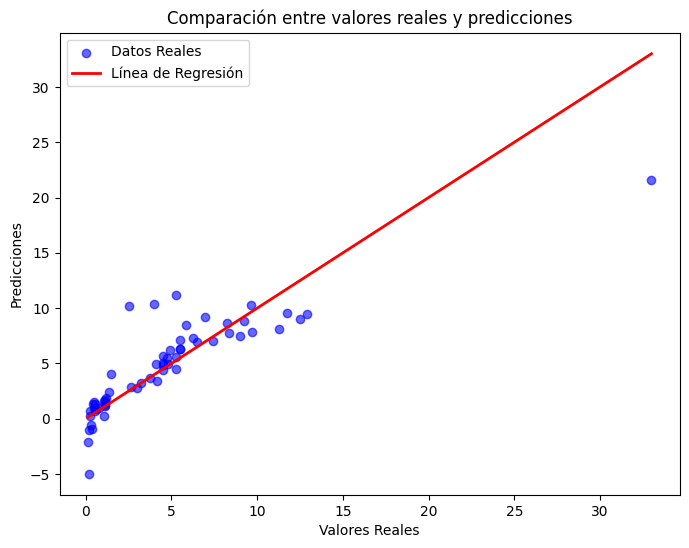

In [85]:
# Gráfico de dispersión (Predicciones vs Valores Reales)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Datos Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones')
plt.legend()
plt.show()

Gráfico de residuos (errores)

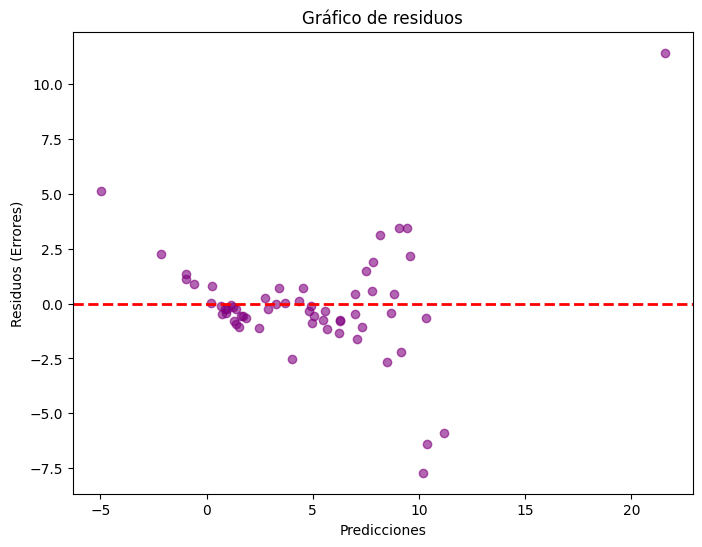

In [86]:
# Gráfico de residuos (errores)
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicciones')
plt.ylabel('Residuos (Errores)')
plt.title('Gráfico de residuos')
plt.show()

Distribución de errores

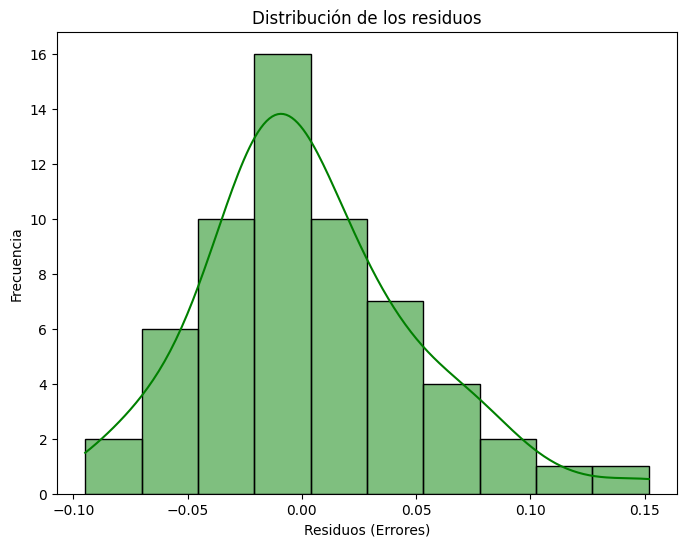

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='green')
plt.title('Distribución de los residuos')
plt.xlabel('Residuos (Errores)')
plt.ylabel('Frecuencia')
plt.show()

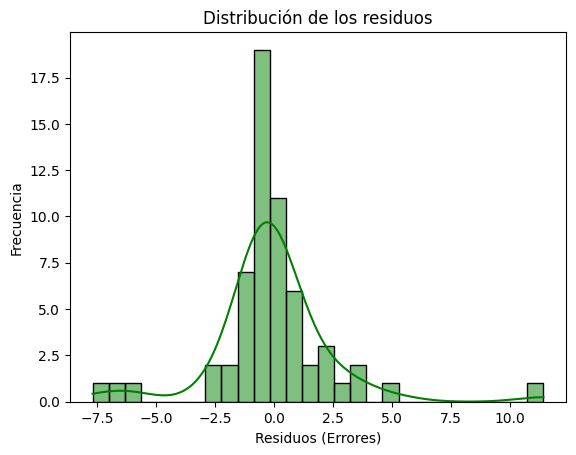

In [87]:
# Distribución de errores
sns.histplot(residuos, kde=True, color='green')
plt.title('Distribución de los residuos')
plt.xlabel('Residuos (Errores)')
plt.ylabel('Frecuencia')
plt.show()

## Predecir el precio de un automóvil:

In [95]:
# Ingresar las características de múltiples automóviles en un dataframe
nuevos_datos = pd.DataFrame({
    'Year': [2015, 2017, 2018],
    'Present_Price': [800, 600, 950],
    'Kms_Driven': [25000, 30000, 10000],
    'Owner': [0, 1, 0],
    'Fuel_Type_Diesel': [0, 1, 0],    # 0 es Petrol, 1 es Diesel
    'Fuel_Type_Petrol': [1, 0, 1],    # 1 es Petrol, 0 es Diesel
    'Seller_Type_Individual': [0, 1, 0],  # 0 es Dealer, 1 es Individual
    'Transmission_Manual': [1, 1, 0]  # 1 es Manual, 0 es Automática
})

# Utilizar el modelo entrenado para predecir el precio de venta de los tres autos
precios_predichos = model.predict(nuevos_datos)

# Mostrar las predicciones para cada automóvil
for i, precio in enumerate(precios_predichos):
    print(f"El precio de venta predicho para el Auto {i+1} es: {precio:.2f} unidades monetarias")



El precio de venta predicho para el Auto 1 es: 351.59 unidades monetarias
El precio de venta predicho para el Auto 2 es: 265.56 unidades monetarias
El precio de venta predicho para el Auto 3 es: 419.89 unidades monetarias


## Interpretar y analizar los resultados

Finalmente, interpretamos los resultados obtenidos.

Si el R² es cercano a 1, significa que el modelo se ajusta bien a los datos.

Además, si los residuos están distribuidos de manera aleatoria alrededor de 0, significa que el modelo tiene un buen ajuste.

R²: Explica qué porcentaje de la variación en la variable objetivo puede ser explicada por el modelo.

MSE/MAE: Indican la magnitud del error en las predicciones.

Gráficos: Nos ayudan a visualizar el comportamiento del modelo y los errores.